In [33]:
import torchvision.models as models
import torch
import torch.nn as nn
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [34]:
alexnet = models.alexnet(pretrained = True)

In [35]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [36]:
from torchvision import transforms
from PIL import Image
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

In [37]:
def squareCrop(x, squareDim):
    left = (x.size[0]-squareDim)/2
    upper = (x.size[1]-squareDim)/2
    right = (x.size[0] + squareDim)/2
    lower = (x.size[1] + squareDim)/2
    return x.crop(box = (left, upper, right, lower))

In [38]:
def resize(x, squareDim):
    width, height = x.size
    scale = squareDim/min(width, height)
    return x.resize((int(scale * width), int(scale * height)), resample = Image.LANCZOS)

In [39]:
def getImages(path, fileEnding, num):
    images = [Image.open(path + str(i) + fileEnding) for i in range(num)]

    minWidth = min(images, key = lambda x: x.size[0]).size[0]
    minHeight = min(images, key = lambda x: x.size[1]).size[1]
    squareDim = min(minWidth, minHeight)

    print(squareDim,"x",squareDim)

    cropfn = lambda x: x.crop(box = ((x.size[0]-squareDim)/2,(x.size[1]-squareDim)/2,squareDim,squareDim))
    for i in range(len(images)):
        images[i] = squareCrop(resize(images[i],squareDim), squareDim)#.convert('LA')
    return images

In [40]:
def displayImages(images):
    i = 1
    plt.figure(figsize=(20,20))
    for im in images:
        ax = plt.subplot(10,12,i) #can change
        ax.imshow(np.asarray(im))
        ax.axis('off') 
        i += 1

In [41]:
# Import Pillow
from PIL import Image
# img = Image.open("dog.jpg")
dogPath = "Images/randDogSet/img_"
buildingPath = "Images/randBuildingSet/img_"
fileEnding = ".jpg"
num = 120

dogImages = getImages(dogPath, fileEnding, num)
buildingImages = getImages(buildingPath, fileEnding, num)

159 x 159
168 x 168


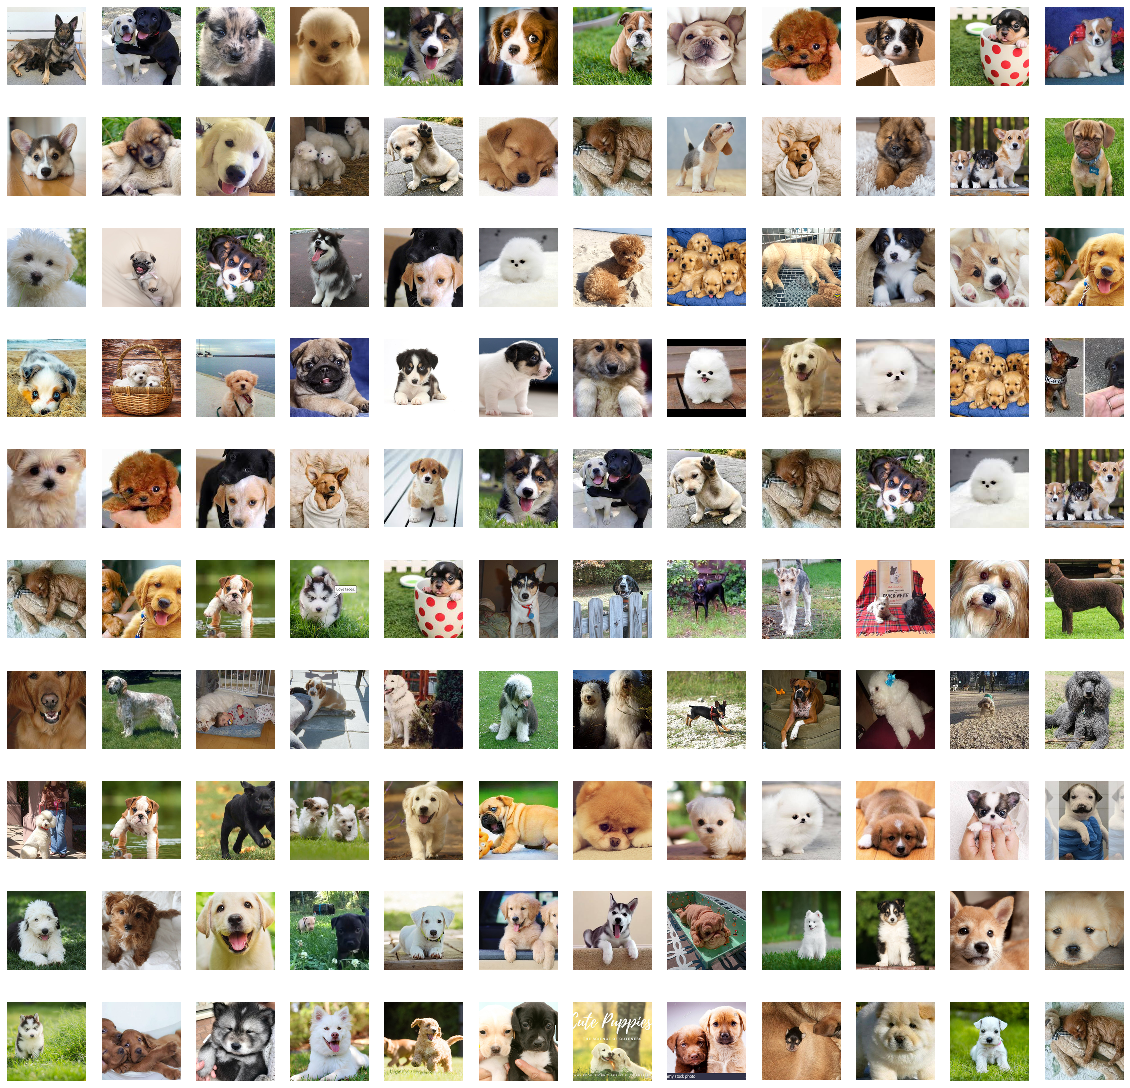

In [42]:
displayImages(dogImages)

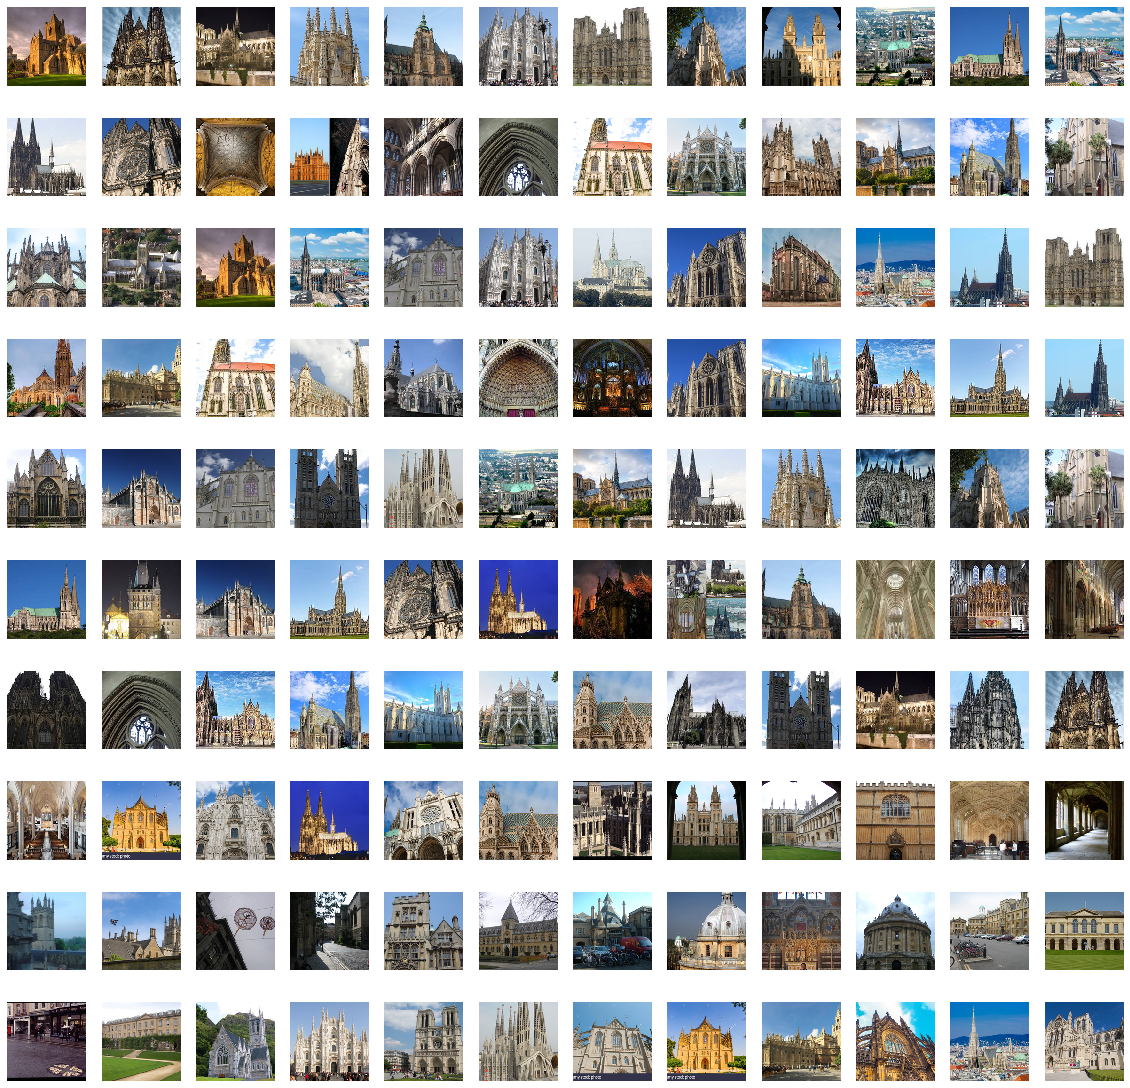

In [43]:
displayImages(buildingImages)

In [44]:
batch_t = []
i = 0
for img in dogImages + buildingImages:
    img_t = transform(img)
    batch_t.append(torch.unsqueeze(img_t, 0)) # batch_t is set of transformed image

In [45]:
alexnet.eval() # change alexnet model to eval mode

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [46]:
out = []
for i in range(len(batch_t)):
    out.append(alexnet(batch_t[i]))
print(out[0].shape)
print(out[-1].shape)

torch.Size([1, 1000])
torch.Size([1, 1000])


In [47]:
model = models.alexnet(pretrained=True)

In [48]:
i = 0
j = 0
a = []
for child in model.children():
    print("child", i,":")
    if isinstance(child, nn.AdaptiveAvgPool2d):
        print("\t" + str(child))
    else:
        for param in child:
            print("\tLayer", j ,":", param)
            instance = isinstance(param, nn.ReLU) or isinstance(param, nn.MaxPool2d) or isinstance(param, nn.Dropout)
            if not instance:
                a.append(param.weight)
            j += 1
    i += 1
# need to pick layer to read out the features from passing an image through the network 

child 0 :
	Layer 0 : Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
	Layer 1 : ReLU(inplace=True)
	Layer 2 : MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
	Layer 3 : Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
	Layer 4 : ReLU(inplace=True)
	Layer 5 : MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
	Layer 6 : Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
	Layer 7 : ReLU(inplace=True)
	Layer 8 : Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
	Layer 9 : ReLU(inplace=True)
	Layer 10 : Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
	Layer 11 : ReLU(inplace=True)
	Layer 12 : MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
child 1 :
	AdaptiveAvgPool2d(output_size=(6, 6))
child 2 :
	Layer 13 : Dropout(p=0.5, inplace=False)
	Layer 14 : Linear(in_features=9216, out_features=4096, bias=True)
	Layer 15 : ReLU(i

In [49]:
#weights
print(a)

[Parameter containing:
tensor([[[[ 1.1864e-01,  9.4069e-02,  9.5435e-02,  ...,  5.5822e-02,
            2.1575e-02,  4.9963e-02],
          [ 7.4882e-02,  3.8940e-02,  5.2979e-02,  ...,  2.5709e-02,
           -1.1299e-02,  4.1590e-03],
          [ 7.5425e-02,  3.8779e-02,  5.4930e-02,  ...,  4.3596e-02,
            1.0225e-02,  1.3251e-02],
          ...,
          [ 9.3155e-02,  1.0374e-01,  6.7547e-02,  ..., -2.0277e-01,
           -1.2839e-01, -1.1220e-01],
          [ 4.3544e-02,  6.4916e-02,  3.6164e-02,  ..., -2.0248e-01,
           -1.1376e-01, -1.0719e-01],
          [ 4.7369e-02,  6.2543e-02,  2.4758e-02,  ..., -1.1844e-01,
           -9.5567e-02, -8.3890e-02]],

         [[-7.2634e-02, -5.7996e-02, -8.0661e-02,  ..., -6.0304e-04,
           -2.5309e-02,  2.5471e-02],
          [-6.9042e-02, -6.7562e-02, -7.6367e-02,  ..., -3.9616e-03,
           -3.0402e-02,  1.0477e-02],
          [-9.9517e-02, -8.5592e-02, -1.0521e-01,  ..., -2.6587e-02,
           -2.2777e-02,  6.6451e-03

In [50]:
#truncating neural net layers
l = list(model.children())
delete = 6 #number of truncating layers from the model
nn_trunc = nn.Sequential(*l[0][:len(l[0])-delete])

In [51]:
print(nn_trunc)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


In [52]:
#output of passing image to model
out = []
for i in range(2*num):
    out.append(nn_trunc(batch_t[i]))
print(out[0].shape)
print(out[-1].shape)

torch.Size([1, 384, 13, 13])
torch.Size([1, 384, 13, 13])


In [53]:
#reshaping output to 2 dims
arr = []
for i in range(2 * num):
    arr.append(out[i].view(1, out[i].shape[0]*out[i].shape[1]*out[i].shape[2]*out[i].shape[3]))
print(arr)
print(len(arr),arr[0].shape)

[tensor([[-1.0040, -4.1325, -4.9830,  ...,  0.2309,  3.4544,  8.6254]],
       grad_fn=<ViewBackward>), tensor([[ -2.4187,   1.7974,   2.6184,  ...,  -2.6067, -11.0501,  -3.6272]],
       grad_fn=<ViewBackward>), tensor([[-1.9409, -1.7765, -3.7633,  ..., -2.8355, -2.9580, -4.1825]],
       grad_fn=<ViewBackward>), tensor([[ 4.5787,  8.7744,  1.3415,  ..., -5.2162, -4.7661, -3.0348]],
       grad_fn=<ViewBackward>), tensor([[-1.4448, -1.9910, -2.8313,  ...,  2.3346, -0.8089, -3.6518]],
       grad_fn=<ViewBackward>), tensor([[-1.6968,  0.5740, -2.2669,  ..., -0.8256, -6.5074, -3.0696]],
       grad_fn=<ViewBackward>), tensor([[-2.1023, -3.3360, -2.8428,  ...,  3.0039,  3.5437,  1.9854]],
       grad_fn=<ViewBackward>), tensor([[-0.5569, -3.4689, -7.9700,  ..., -6.2740, -6.6396, -1.9752]],
       grad_fn=<ViewBackward>), tensor([[-1.6564, -3.2329, -5.4057,  ..., -8.3217, -6.5031, -1.8378]],
       grad_fn=<ViewBackward>), tensor([[-5.5365, -9.3418, -5.9673,  ..., -4.7530, -3.6411, -2.177

In [54]:
# Convert to numpy matrix
import numpy as np
x = arr[0].detach().numpy()
for nparr in arr[1:]:
    x = np.vstack([x, nparr.detach().numpy()])

In [56]:
#Dimension Reductionality
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [57]:
#PCA
print(x.shape)
pca = PCA(n_components=num*2)
pca_result = pca.fit_transform(x)
print(pca_result.shape)

(240, 64896)
(240, 240)


In [58]:
#TSNE
tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result)
print(tsne_pca_results.shape)

(240, 3)


In [59]:
#separate sets of images
dogs = tsne_pca_results[:num]
buildings = tsne_pca_results[num:]
print(dogs,dogs.shape)
print(buildings, buildings.shape)

[[-2.34305859e+01 -1.96858406e+01  2.17950802e+01]
 [-2.41921616e+00 -9.67257614e+01  2.56983547e+01]
 [ 1.37478743e+01 -2.75206451e+01  9.87911224e+00]
 [-5.84699402e+01 -6.47128372e+01 -2.18382168e+01]
 [ 2.95796471e+01  1.35994587e+01 -2.52673864e+00]
 [ 8.57955551e+00 -2.21812935e+01 -1.57068720e+01]
 [-1.13585958e+01 -1.80161877e+01 -2.35811520e+00]
 [ 1.22437897e+01 -1.90599327e+01 -2.76920624e+01]
 [ 1.95387516e+01 -3.58774223e+01  5.80636311e+00]
 [ 1.82037811e+01 -2.99157276e+01 -1.63878956e+01]
 [-9.29056835e+00 -2.53535557e+01  2.32689648e+01]
 [ 1.06350327e+00 -2.28509655e+01  2.90344238e+01]
 [ 1.74642677e+01 -1.35474615e+01  1.83723736e+01]
 [-1.95993671e+01 -2.91168251e+01 -2.81973863e+00]
 [ 1.27496033e+01 -1.16376648e+01 -1.42018785e+01]
 [-2.33949718e+01  2.75112396e+02 -1.00507156e+02]
 [-2.61480236e+01  8.76445236e+01  2.75278931e+01]
 [-3.92404747e+01 -5.57183876e+01 -3.25076953e-02]
 [ 4.75898266e+00  8.04235153e+01  2.52152195e+01]
 [ 1.12319732e+00 -2.10143223e+

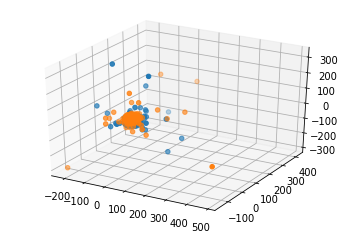

In [60]:
fig= plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y,z = dogs[:,0],dogs[:,1],dogs[:,2]
ax.scatter(x,y,z)

x,y,z = buildings[:,0],buildings[:,1],buildings[:,2]
ax.scatter(x,y,z)